In [ ]:
!pip install pennylane pennylane-qiskit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 65.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a General Quantum Circuit
def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)
    @qml.qnode(dev)
    def circuit():
        RandomLayers(weights=np.random.uniform(0, 2 * np.pi, (depth, qubits)), wires=range(qubits))
        return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]
    return circuit

# Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=5)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Develop a Model to Distinguish Data
X_list = []
y_list = []

for backend_name in backend_names:
    backend_data = data[backend_name]
    if backend_data:
        X_list.append(np.vstack(backend_data))
        y_list.append([backend_names.index(backend_name)] * len(backend_data))

if X_list and y_list:
    X = np.vstack(X_list)
    y = np.concatenate(y_list)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a random forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
else:
    print("No data available for training.")

Accuracy: 1.0


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a General Quantum Circuit
def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)
    @qml.qnode(dev)
    def circuit():
        RandomLayers(weights=np.random.uniform(0, 2 * np.pi, (depth, qubits)), wires=range(qubits))
        return [qml.expval(qml.PauliZ(i)) for i in range(qubits)]
    return circuit

# Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=5)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)
    else:
        print("No data available for training.")

Epoch 1/5
Accuracy: 1.0
Epoch 2/5
Accuracy: 1.0
Epoch 3/5
Accuracy: 1.0
Epoch 4/5
Accuracy: 1.0
Epoch 5/5
Accuracy: 1.0


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit
# Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=5)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)
    else:
        print("No data available for training.")

Epoch 1/5
Accuracy: 1.0
Epoch 2/5
Accuracy: 1.0
Epoch 3/5
Accuracy: 1.0
Epoch 4/5
Accuracy: 1.0
Epoch 5/5
Accuracy: 1.0


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit
# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=5)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

if X_list and y_list:
    X = np.vstack(X_list)
    y = np.concatenate(y_list)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a random forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy is not None:
        print("Accuracy:", accuracy)
    else:
        print("No accuracy score computed.")

else:
    print("No data available for training.")


Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Accuracy: 1.0


In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit
# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=5)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))


if X_list and y_list:
    X = np.vstack(X_list)
    y = np.concatenate(y_list)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a random forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
else:
    print("No data available for training.")
    # Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Accuracy after training on 240 samples: 1.0
Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
0000000-100-10
0-100000010-1-1
000000000000
000000000001
10-1000000-111
-10-1-100000-11-1
000000-1-10100
100-100000-100
-100000010-11-1
000100000010
000000000000
0000000000-11
000-1

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit
# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=5)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))


if X_list and y_list:
    X = np.vstack(X_list)
    y = np.concatenate(y_list)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a random forest classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
else:
    print("No data available for training.")
    # Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
Accuracy after training on 240 samples: 1.0
Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
0000000-100-10
0-100000010-1-1
000000000000
000000000001
10-1000000-111
-10-1-100000-11-1
000000-1-10100
100-100000-100
-100000010-11-1
000100000010
000000000000
0000000000-11
000-1

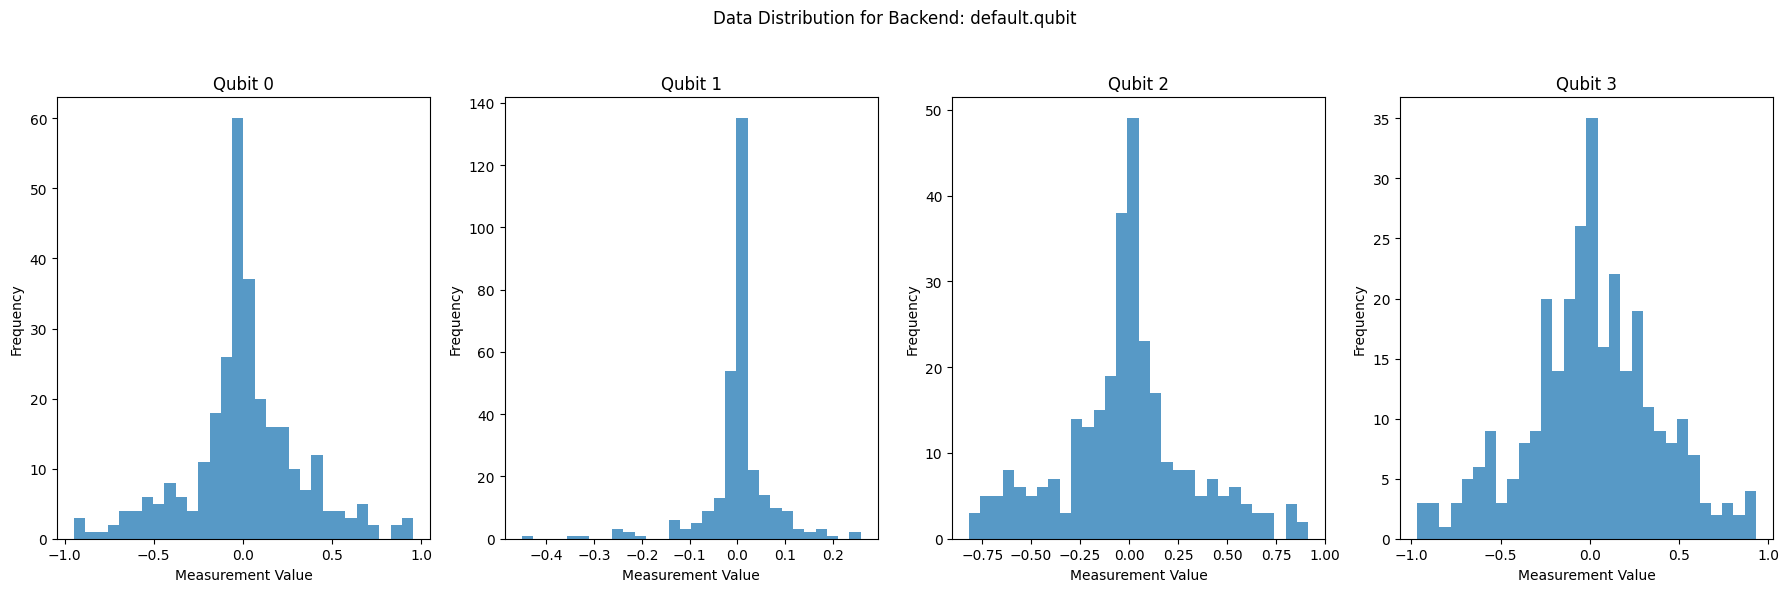

Epoch 1/5
Accuracy after training on 240 samples: 1.0
Epoch 2/5
Accuracy after training on 240 samples: 1.0
Epoch 3/5
Accuracy after training on 240 samples: 1.0
Epoch 4/5
Accuracy after training on 240 samples: 1.0
Epoch 5/5
Accuracy after training on 240 samples: 1.0
Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
00000

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


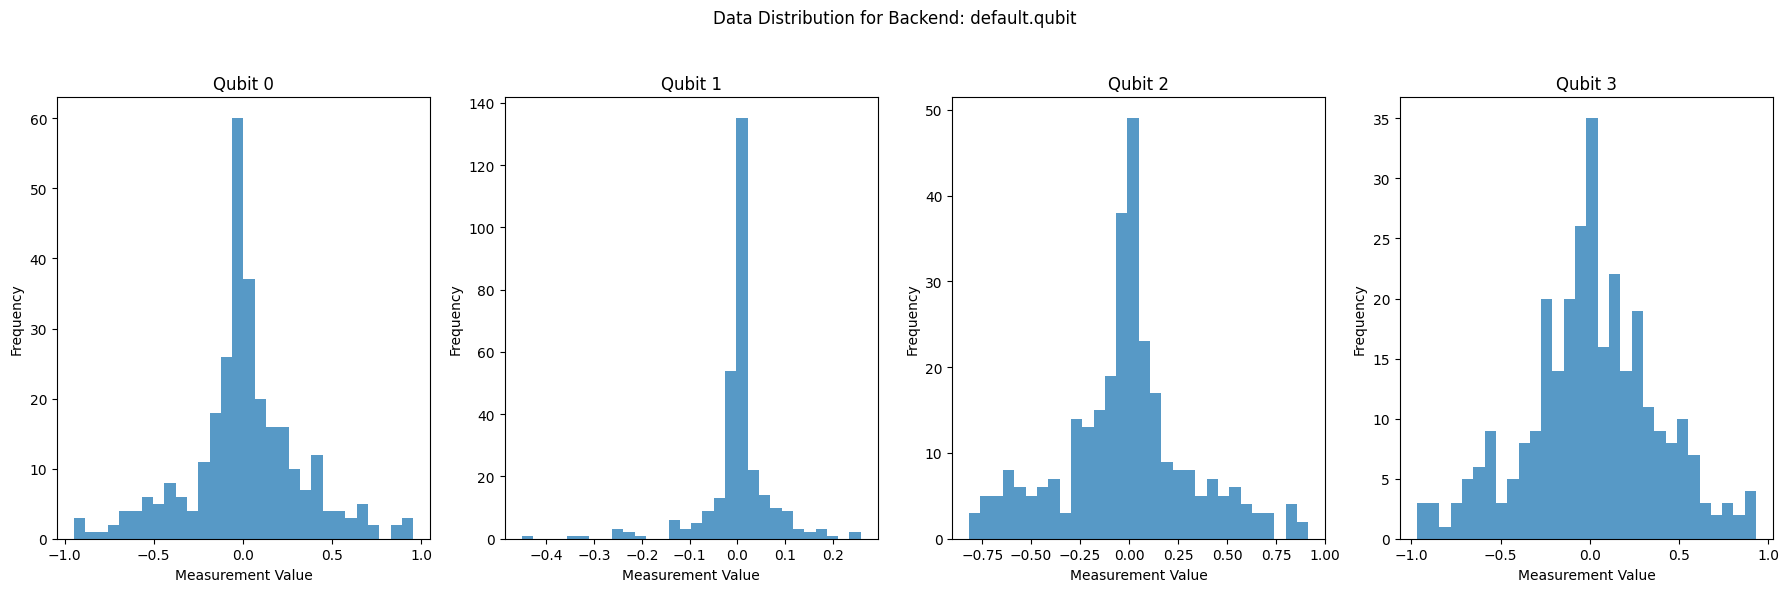

Epoch 1/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



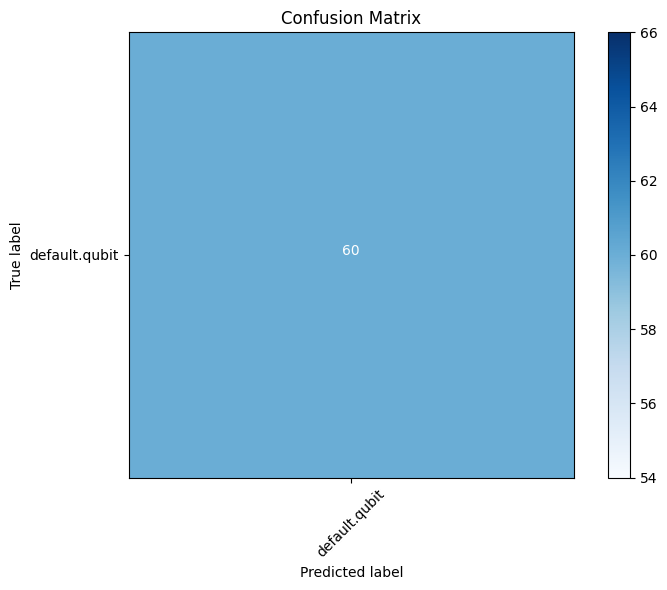

Epoch 2/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



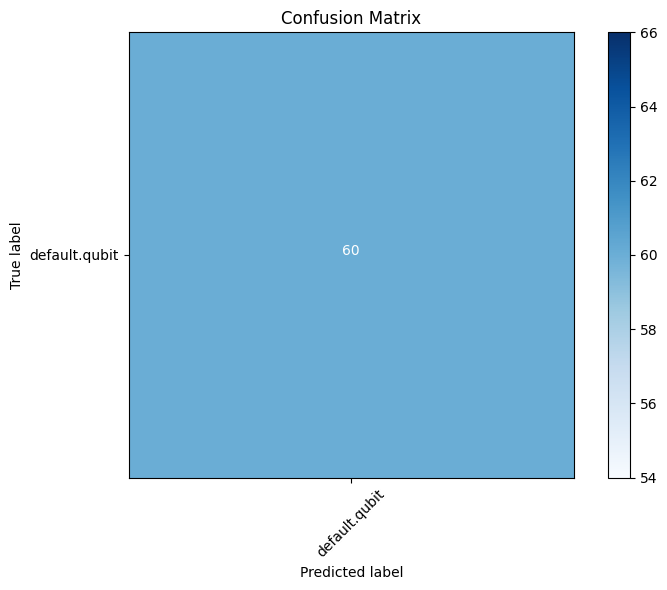

Epoch 3/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



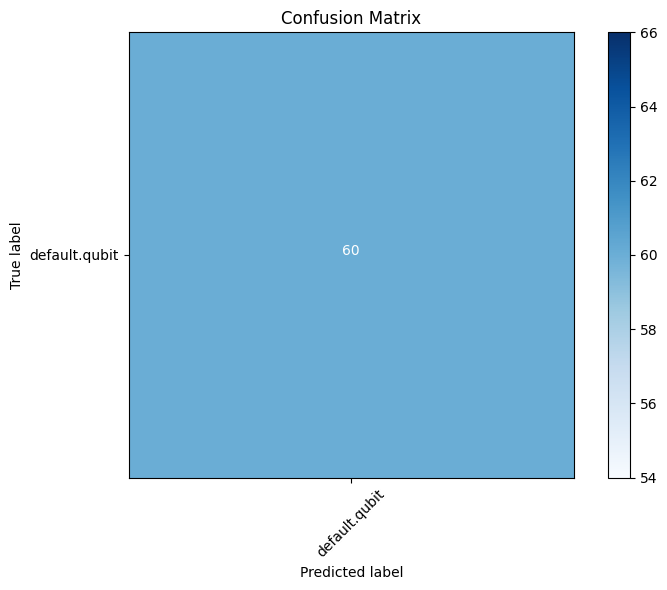

Epoch 4/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



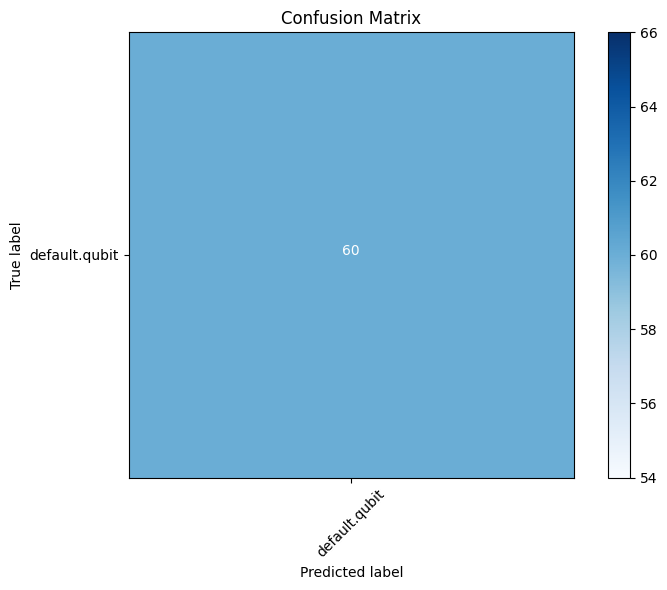

Epoch 5/5
Accuracy after training on 240 samples: 1.0
Confusion Matrix:
[[60]]
Classification Report:
               precision    recall  f1-score   support

default.qubit       1.00      1.00      1.00        60

     accuracy                           1.00        60
    macro avg       1.00      1.00      1.00        60
 weighted avg       1.00      1.00      1.00        60



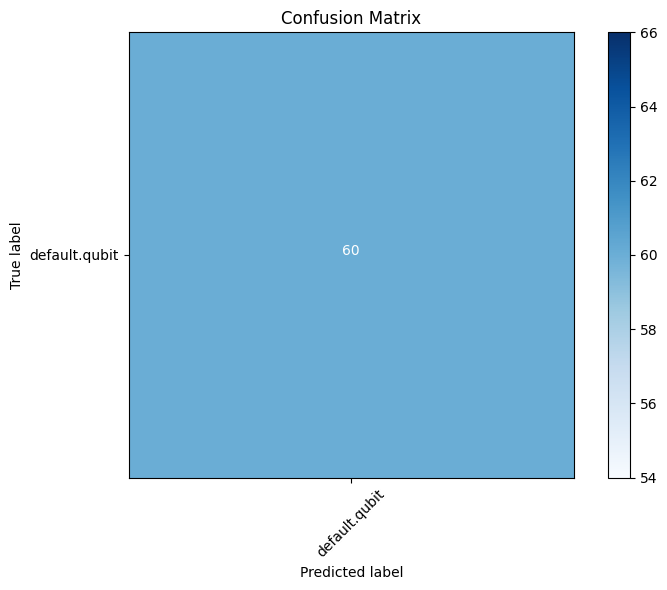

Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
0000000-100-10
0-100000010-1-1
000000000000
000000000001
10-1000000-111
-10-1-100000-11-1
000000-1-10100
100-100000-100
-100000010-11-1
000100000010
000000000000
0000000000-11
000-100000000
0000000011-11
0000000000-10
-100000-100-1-11
-101000-100101
000100010010
000000000-11

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import itertools

def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        unique_labels = np.unique(y_test)
        class_report = classification_report(y_test, y_pred, target_names=[backend_names[label] for label in unique_labels])

        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(class_report)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title("Confusion Matrix")
        plt.colorbar()
        tick_marks = np.arange(len(unique_labels))
        plt.xticks(tick_marks, [backend_names[label] for label in unique_labels], rotation=45)
        plt.yticks(tick_marks, [backend_names[label] for label in unique_labels])

        fmt = 'd'
        thresh = conf_matrix.max() / 2.
        for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
            plt.text(j, i, format(conf_matrix[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()
        plt.show()

    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


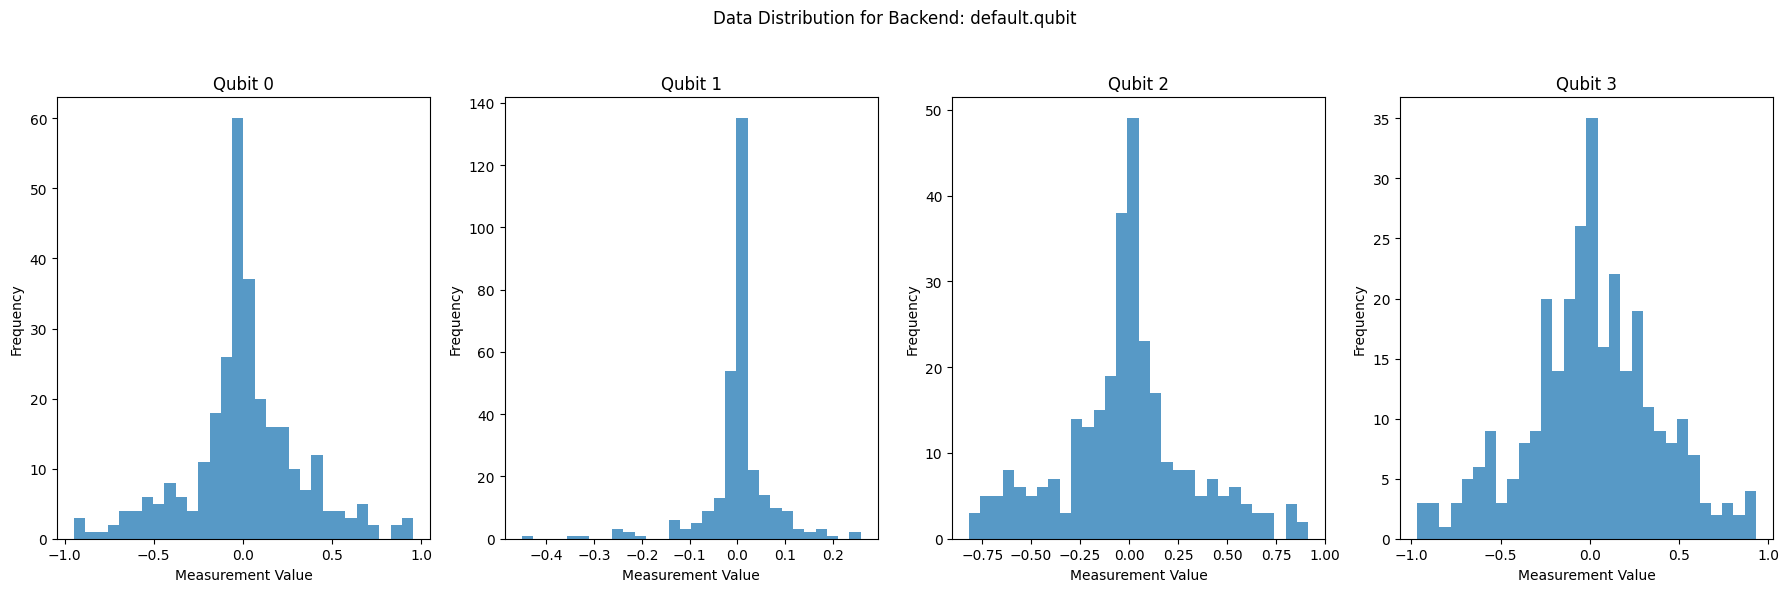

Epoch 1/5
Accuracy after training on 240 samples: 1.0
Epoch 2/5
Accuracy after training on 240 samples: 1.0
Epoch 3/5
Accuracy after training on 240 samples: 1.0
Epoch 4/5
Accuracy after training on 240 samples: 1.0
Epoch 5/5
Accuracy after training on 240 samples: 1.0
Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
00000

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print(f"Accuracy after training on {X_train.shape[0]} samples: {accuracy_percent:.2f}%")
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test set:", accuracy)

In [ ]:
!pip install pennylane-lightning[kokkos]
!pip install pennylane-lightning

In [ ]:
!pip install amazon-braket-pennylane-plugin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 693.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.6/312.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.7/191.7 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.0/377.0 kB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.0/524.0 kB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.

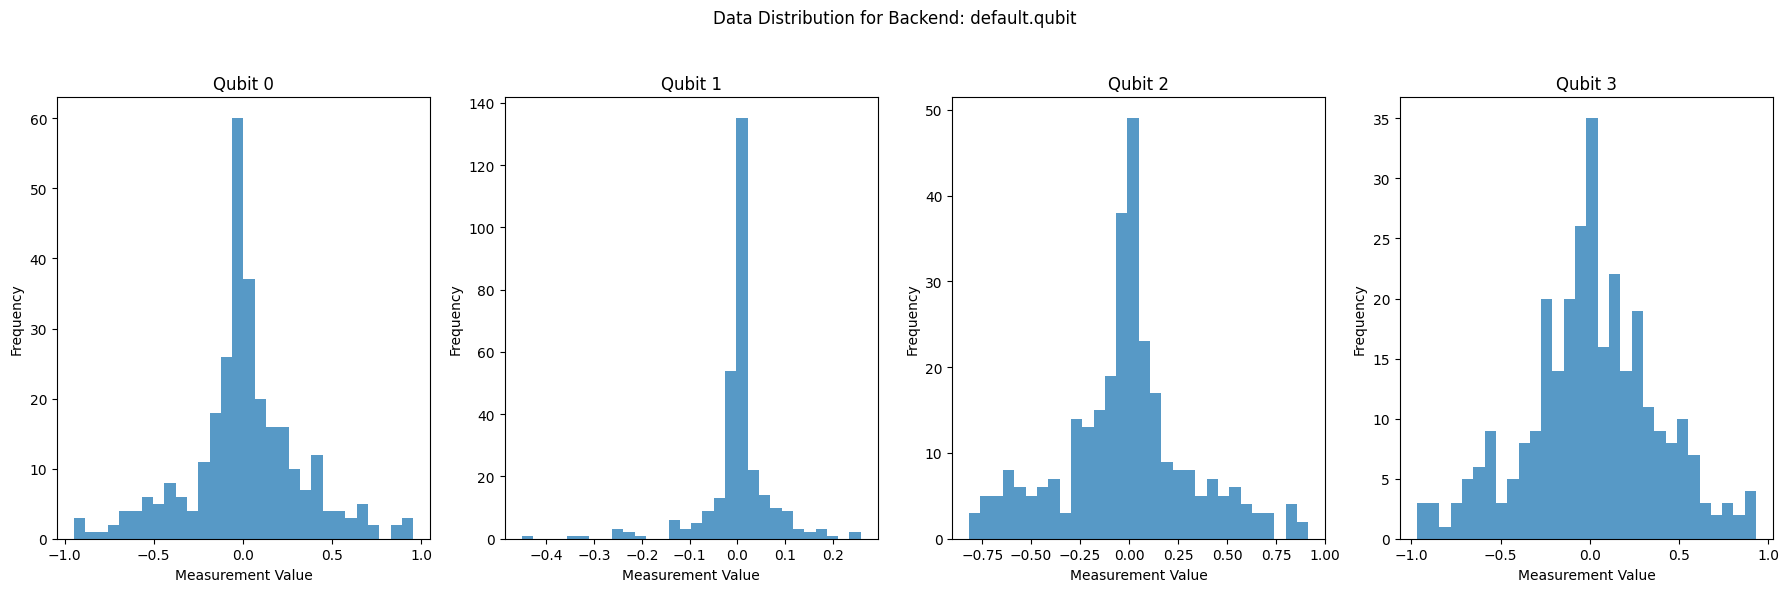

Epoch 1/5
Accuracy after training on 240 samples: 1.0
Epoch 2/5
Accuracy after training on 240 samples: 1.0
Epoch 3/5
Accuracy after training on 240 samples: 1.0
Epoch 4/5
Accuracy after training on 240 samples: 1.0
Epoch 5/5
Accuracy after training on 240 samples: 1.0
Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
00000

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pennylane as qml
dev = qml.device("lightning.kokkos", wires=2)

def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print(f"Accuracy after training on {X_train.shape[0]} samples: {accuracy_percent:.2f}%")
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test set:", accuracy)

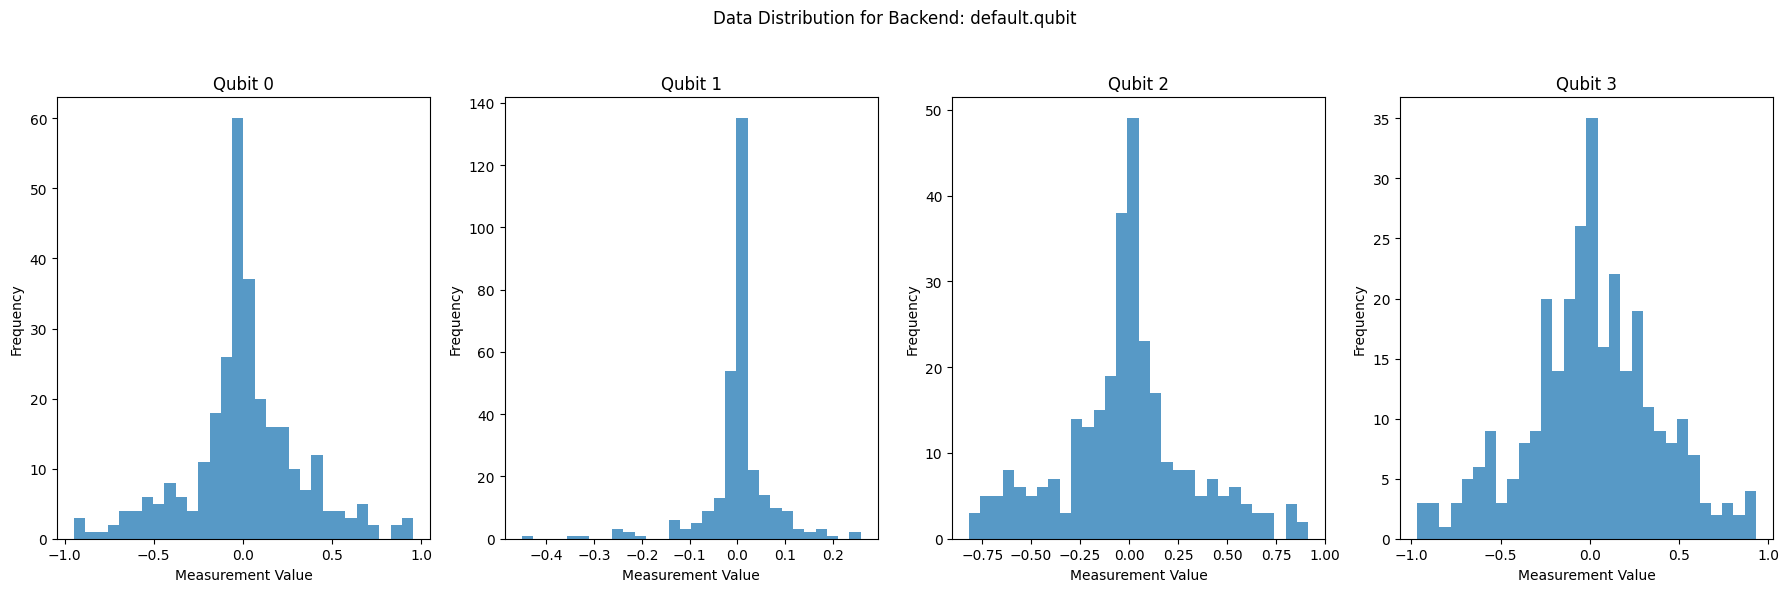

Epoch 1/5
Accuracy after training on 240 samples: 1.0
Epoch 2/5
Accuracy after training on 240 samples: 1.0
Epoch 3/5
Accuracy after training on 240 samples: 1.0
Epoch 4/5
Accuracy after training on 240 samples: 1.0
Epoch 5/5
Accuracy after training on 240 samples: 1.0
Output strings for backend default.qubit:
000-1000000-10
000000000000
00000000000-1
000000000000
-100100000-110
000000000-101
0000000-10-110
000100000000
0000-10100101
000-1000000-10
0000000-10000
0000000100-1-1
000000000000
001000000-100
000000000000
0000000-100-1-1
000000000-110
000-100000000
000000000000
001000100-100
000-100000010
1000000-10100
00-1000000-100
000000000000
000000100-1-10
001000000100
100100-100-100
000000010000
00000000001-1
000000101-101
00000000101-1
001000000100
000000-100100
-101000000100
000100000000
000000010100
00000000000-1
00-1000000100
000000000010
000000000001
000100000010
0000000-10-1-1-1
000000000-10-1
000000000000
0000000001-10
0000000000-10
000000001001
00000000-100-1
000000000000
00000

In [ ]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pennylane as qml
dev = qml.device("lightning.qubit", wires=2)

def quantum_volume_circuit(qubits, depth, seed=None):
    dev = qml.device("default.qubit", wires=qubits)

    @qml.qnode(dev)
    def circuit():
        # Apply random rotations
        for wire in range(qubits):
            qml.RX(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RY(np.random.uniform(0, 2 * np.pi), wires=wire)
            qml.RZ(np.random.uniform(0, 2 * np.pi), wires=wire)

        # Interleave random two-qubit gates
        for _ in range(depth):
            qml.broadcast(qml.CNOT, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CY, wires=range(qubits), pattern='ring')
            qml.broadcast(qml.CZ, wires=range(qubits), pattern='ring')

        # Measure Pauli observables
        measurements = [qml.expval(qml.PauliX(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliY(wire)) for wire in range(qubits)]
        measurements += [qml.expval(qml.PauliZ(wire)) for wire in range(qubits)]

        return measurements

    return circuit

# Step 2: Setup Quantum Backends
qubits = 4
depth = 2
num_samples = 100
np.random.seed(42)

circuits = []
backend_names = ['default.qubit', 'qiskit.aer', 'qiskit.ibmq']

for backend_name in backend_names:
    dev = qml.device('default.qubit', wires=qubits)
    circuit = quantum_volume_circuit(qubits, depth)
    circuits.append((dev, circuit))

# Step 3: Run Circuits on Different Backends and Obtain Output Strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    for _ in range(num_samples):
        result = np.array(circuit())  # Ensure result is a numpy array
        if result.ndim == 0:
            result = np.array([result])  # Convert to 1-dimensional array
        elif result.ndim == 2:
            result = result.flatten()  # Flatten 2-dimensional array to 1-dimensional
        data[backend.name].append(result)

# Visualize the data using histograms
for backend_name in backend_names:
    backend_data = np.array(data[backend_name])
    if len(backend_data) > 0:
        plt.figure(figsize=(18, 6))
        plt.suptitle(f"Data Distribution for Backend: {backend_name}")
        for i, qubit in enumerate(range(qubits)):
            plt.subplot(1, qubits, i + 1)
            plt.hist(backend_data[:, i], bins=30, alpha=0.75)
            plt.xlabel("Measurement Value")
            plt.ylabel("Frequency")
            plt.title(f"Qubit {qubit}")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Specify number of epochs
num_epochs = 5

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")

    # Step 4: Develop a Model to Distinguish Data
    X_list = []
    y_list = []

    for backend_name in backend_names:
        backend_data = data[backend_name]
        if backend_data:
            X_list.append(np.vstack(backend_data))
            y_list.append([backend_names.index(backend_name)] * len(backend_data))

    if X_list and y_list:
        X = np.vstack(X_list)
        y = np.concatenate(y_list)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train a random forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy after training on {X_train.shape[0]} samples:", accuracy)
    else:
        print("No data available for training.")

# Print output strings
data = {backend_name: [] for backend_name in backend_names}

for backend, circuit in circuits:
    print(f"Output strings for backend {backend.name}:")
    for _ in range(num_samples):
        result = circuit()
        # Convert measurement results to strings
        output_string = "".join([str(int(np.round(res))) for res in result])
        data[backend.name].append(output_string)
        print(output_string)
    print()


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy_percent = accuracy * 100
print(f"Accuracy after training on {X_train.shape[0]} samples: {accuracy_percent:.2f}%")
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on test set:", accuracy)